In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# Описание задачи
Мы имеем набор данных о бронировании номеров в отелях. Суть задачи заключается в том, чтобы спрогнозировать, будет ли отменена бронь или нет.

# 1. Чтение данных

In [2]:
url = "https://raw.githubusercontent.com/valeria-vag/machine-learning-course/main/hotel_booking.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(119390, 36)

Этот набор данных содержит 119390 наблюдений для городского отеля и Курортного отеля. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года.

In [3]:
data_raw.shape

(119390, 36)

In [4]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Рассмотрим каждый признак: 

0 TotalOfSpecialRequests - Числовой - Количество особых запросов, сделанных клиентом (например, двуспальная кровать или высокий этаж).

1 ADR - Числовой - Средняя Дневная Норма. Рассчитывается путем деления суммы всех сделок по размещению на общее количество ночей проживания.

2 Adults - Числовой - Количество взрослых

3 Agent - Числовой - Идентификатор туристического агентства, которое сделало бронирование.

4 ArrivalDateDayOfMonth - Числовой - День месяца даты прибытия.

5 ArrivalDateMonth - Категориальный - Месяц даты прибытия с 12 категориями: “Январь” - “Декабрь”.

6 ArrivalDateWeekNumber - Числовой - Номер недели прибытия.

7 ArrivalDateYear - Числовой - Год прибытия.

8 AssignedRoomType - Категориальный - Код для типа номера, назначенного при бронировании. Иногда назначенный тип номера 
отличается от зарезервированного типа номера по причинам работы отеля (например, из-за избыточного бронирования) или по запросу клиента. Код представлен вместо обозначения по соображениям анонимности.

9 Babies - Числовой - Количество младенцев

10 BookingChanges - Числовой - Количество изменений/поправок, внесенных в бронирование с момента ввода бронирования в Систему управления недвижимостью до момента регистрации заезда или отмены. Рассчитывается путем добавления количества уникальных итераций, которые изменяют некоторые атрибуты бронирования, а именно: людей, дату прибытия, ночи, тип забронированного номера или питание.

11 Children - Числовой - Количество детей. Как подлежащие, так и не подлежащие оплате дети.

12 Company - Числовой - Идентификатор компании/организации, которая сделала бронирование или несет ответственность за оплату бронирования. Идентификатор предоставляется вместо обозначения по соображениям анонимности.

13 Country - Категориальный - Страна происхождения. Категории представлены в формате Международной организации по стандартизации (ISO) 3155-3:2013.

14 CreditCard - Категориальный - Номер кредитной карты клиента. Искусственно созданный.

15 CustomerType - Категориальный - Тип бронирования, предполагающий одну из четырех категорий: Контракт (когда с бронированием связано выделение или другой тип контракта), Групповой (когда бронирование связано с группой), Временный (когда бронирование не является частью группы или контракта и не связано с другим временным бронированием) и Временный участник (когда бронирование временное, но связано по крайней мере с другим временным бронированием).

16 DaysInWaitingList - Числовой - Количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту. Рассчитывается путем вычитания даты подтверждения бронирования клиенту из даты бронирования, введенной в Систему управления недвижимостью.

17 DepositType - Категориальный - Указание на то, внес ли клиент депозит для гарантии бронирования. Эта переменная может принимать три категории: Без депозита (депозит не был внесен), Без возврата (депозит был внесен в размере общей стоимости проживания) и Возвращаемый (депозит был внесен на сумму, меньшую общей стоимости проживания). Стоимость рассчитывается на основе платежей, указанных для бронирования в таблице транзакций (TR) до даты прибытия или отмены бронирования. В случае, если платежи не были найдены, значение равно “Без депозита”. Если оплата была равна или превышала общую стоимость проживания, значение устанавливается как “Невозврат”. В противном случае значение устанавливается как “Возвращаемое”.

18 DistributionChannel - Категориальный - Канал распространения бронирования. Термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.

19 Email - Категориальный - Электронная почта клиента. Искусственно созданный.

20 Hotel - Категориальный - Тип отеля. Категории представлены в Городском отеле и Курортном отеле

21 IsCanceled - Категориальный - Значение, указывающее, было ли отменено бронирование (1) или нет (0).

22 IsRepeatedGuest - Категориальный - Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0). 
Переменная, созданная путем проверки, был ли профиль связан с клиентом бронирования. Если это так, и если дата создания профиля клиента была до даты создания бронирования в базе данных Системы управления недвижимостью, предполагалось, что бронирование было от повторного гостя.

23 LeadTime - Числовой - Количество дней, прошедших между датой ввода бронирования в Систему управления недвижимостью и датой прибытия. Рассчитывается путем вычитания вводимых данных из даты прибытия.

24 MarketSegment - Категориальный - Обозначение сегмента рынка. В категориях термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.

25 Meal - Категориальный - Тип забронированного питания. Категории представлены в стандартных пакетах гостиничного питания: Не определено/SC (без пакета питания), BB (Кровать и завтрак), HB (Полупансион: завтрак и еще один прием пищи – обычно ужин) и FB (Полный пансион: завтрак, обед и ужин).

26 Name - Категориальный - Имя клиента. Искусственно созданный.

27 PhoneNumber - Категориальный - Номер телефона клиента. Искусственно созданный.

28 PreviousBookingsNotCanceled - Числовой - Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования. В случае, если с бронированием не был связан профиль клиента, значение устанавливается равным 0. В противном случае значение равно количеству бронирований с одним и тем же профилем клиента, созданных до текущего бронирования и не отмененных.

29 PreviousCancellations - Числовой - Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования. В случае, если с бронированием не был связан профиль клиента, значение устанавливается равным 0. В противном случае значение равно количеству бронирований с одним и тем же профилем клиента, созданных до текущего бронирования и отмененных.

30 RequiredCarParkingSpaces - Числовой - Количество парковочных мест, требуемое заказчиком.

31 ReservationStatus - Категориальный - Статус последнего бронирования, предполагающий одну из трех категорий: Отменено (бронирование было отменено клиентом), Выезд (клиент зарегистрировался, но уже уехал), Неявка (клиент не зарегистрировался и не сообщил отелю о причине).

32 ReservationStatusDate - Категориальный - Дата, когда был установлен последний статус. Эту переменную можно использовать в сочетании со статусом бронирования, чтобы понять, когда было отменено бронирование или когда клиент выехал из отеля.

33 ReservedRoomType - Категориальный - Код зарезервированного типа номера. Код представлен вместо обозначения по соображениям анонимности.

34 StaysInWeekendNights - Числовой - Количество ночей выходного дня (суббота или воскресенье), в течение которых гость останавливался или бронировал проживание в отеле. Рассчитывается путем подсчета количества ночей выходного дня от общего количества ночей.

35 StaysInWeekNights - Числовой - Количество ночей в будние дни (с понедельника по пятницу), в течение которых гость останавливался или бронировал проживание в отеле. Рассчитывается путем подсчета количества ночей в неделю от общего количества ночей.

Удалим несколько признаков, никак не влияющих на финальный результат:

In [6]:
del data_raw['name']
del data_raw['email']
del data_raw['phone-number']
del data_raw['credit_card']

На большинстве сайтов бронирования обычно указаны только категории гостей и детей (до 18 лет),
поэтому мы можем объединить значения детей и младенцев в колонке дети

In [7]:
data_raw['kids'] = data_raw['children'] + data_raw['babies']

In [8]:
del data_raw['children']
del data_raw['babies']

In [9]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


In [10]:
data_raw.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

Заменим тип Object категориальных признаков на специальный тип, который предназначен для хранения таких категориальных значений:

In [11]:
#Categorical
categorical = data_raw.loc[:, (data_raw.dtypes == object)].columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [12]:
data_raw['hotel'] = data_raw['hotel'].astype('category')
data_raw['arrival_date_month'] = data_raw['arrival_date_month'].astype('category')
data_raw['meal'] = data_raw['meal'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')
data_raw['market_segment'] = data_raw['market_segment'].astype('category')
data_raw['distribution_channel'] = data_raw['distribution_channel'].astype('category')
data_raw['reserved_room_type'] = data_raw['reserved_room_type'].astype('category')
data_raw['assigned_room_type'] = data_raw['assigned_room_type'].astype('category')
data_raw['deposit_type'] = data_raw['deposit_type'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['reservation_status'] = data_raw['reservation_status'].astype('category')

In [13]:
data_raw['hotel'].dtype

CategoricalDtype(categories=['City Hotel', 'Resort Hotel'], ordered=False)

In [14]:
data_raw['arrival_date_month'].dtype

CategoricalDtype(categories=['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
, ordered=False)

In [15]:
data_raw['meal'].dtype

CategoricalDtype(categories=['BB', 'FB', 'HB', 'SC', 'Undefined'], ordered=False)

In [16]:
data_raw['country'].dtype

CategoricalDtype(categories=['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
                  'ASM', 'ATA',
                  ...
                  'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF',
                  'ZMB', 'ZWE'],
, ordered=False)

In [17]:
data_raw['market_segment'].dtype

CategoricalDtype(categories=['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
                  'Offline TA/TO', 'Online TA', 'Undefined'],
, ordered=False)

In [18]:
data_raw['distribution_channel'].dtype

CategoricalDtype(categories=['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], ordered=False)

In [19]:
data_raw['reserved_room_type'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], ordered=False)

In [20]:
data_raw['assigned_room_type'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], ordered=False)

In [21]:
data_raw['deposit_type'].dtype

CategoricalDtype(categories=['No Deposit', 'Non Refund', 'Refundable'], ordered=False)

In [22]:
data_raw['customer_type'].dtype

CategoricalDtype(categories=['Contract', 'Group', 'Transient', 'Transient-Party'], ordered=False)

In [23]:
data_raw['reservation_status'].dtype

CategoricalDtype(categories=['Canceled', 'Check-Out', 'No-Show'], ordered=False)

# 2. Визуализация и основные характеристики

In [24]:
data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,0.111839
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.412567
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


Count - Количество значений для каждого признака (пропущенные значения имеют "agent" - 13%, "company - 94%").

Mean - Средние значения.

STD - Стандартные отклонения. Данная константа показывает, на сколько в среднем отклоняются варианты от среднего значения.

Min/Max - Минимальные/Максимальные значения.

25%, 75% - Пертвый и третий квартили. То есть это значения, которые объект не превышает с вероятностью 25% и 75% соответственно.

50% - Квартиль 50% или медиана.

Рассмотрим несколько признаков отдельно:

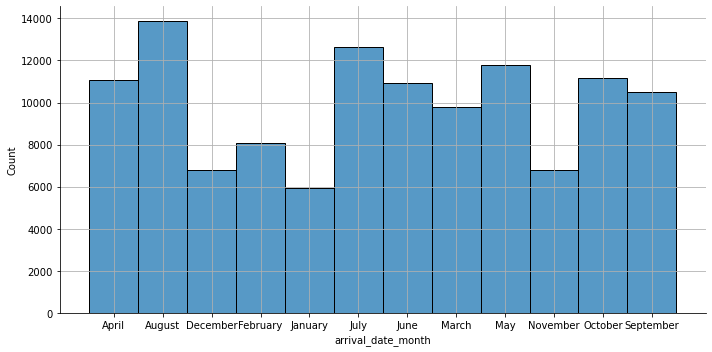

In [25]:
sns.displot(data_raw['arrival_date_month'], height=5, aspect=2)
plt.grid()
pass

В августе наибольший поток, в сентябре - наименьший.

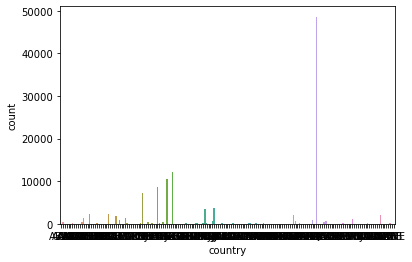

In [26]:
#sns.displot(data_raw['country'], height=5, aspect=15)
#plt.grid()
sns.countplot(x = 'country', data = data_raw)
pass

Можно отметить, что среди всех остальных, чаще всего отели посещают португальцы. Это вполне закономерно, учитывая, что гостиницы расположены в Португалии.

Рассмотрим категориальные признаки:

Count - Количество значений. Все признаки имеют одинаковое количество значений, то есть пропущенных значений нет

Unique - Количество уникальных значений.

Top - Наиболее встречающееся значение.

Freq - Частота наиболее встречающегося значения.

Чтобы вычислить связи между признакми, построим матрицу корреляции

In [27]:
data_raw.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [28]:
corr_matrix = data_raw.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,-0.002797
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,-0.041285
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,0.049653
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,0.007786
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,0.013995
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671,0.048603
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,0.047471
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,0.033699
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030131,-0.006145,-0.087239,-0.097245,-0.146426,1.000000,0.082293,0.418056,0.012092,0.031527,-0.244586,-0.022235,-0.134314,0.077090,0.013050,-0.033856
previous_cancellations,0.110133,0.086042,-0.119822,0.035501,-0.027011,-0.012775,-0.013992,-0.006738,0.082293,1.000000,0.152728,-0.026993,-0.012488,-0.184574,0.005929,-0.065646,-0.018492,-0.048384,-0.025662


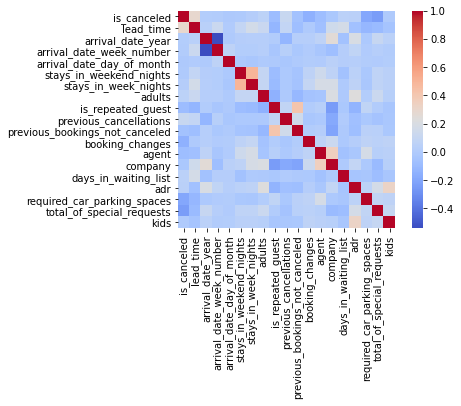

In [29]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Благодаря визуальному образу корреляционной матрицы можно заметить, что признаки "Номер недели прибытия" и "Год прибытия" имеют коэффициент корреляции близкий к нулю. Это говорит о сильной отрицательной связи. 

"Количество ночей в будни" и "Количество ночей в выходные" имеют среднюю связь.

Наша цель - is_canceled (отмена брони) имеет среднюю связь с lead_time (Количество дней, прошедших между датой ввода бронирования в Систему управления недвижимостью и датой прибытия). 

Так же, что вполне очевидно, среднюю связь имеют previos_booking_not_cancelled (Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования) и is_repeated_guest (гость, который уже когда-то являлся клиентом).

Все остальные пары имеют слабую связь.

Рассмотрим категориальные признаки:

In [30]:
data_raw['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Как уже было замечено ранее на диаграмме, чаще всего данные отели посещают в августе и реже всего в январе.

In [31]:
data_raw['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
MMR        1
MRT        1
SMR        1
PYF        1
Name: country, Length: 177, dtype: int64

Так же, чаще всего посетителями являются граждане Португалии.

Посмотрим на всевозможные диаграммы рассеивания для каждой пары признаков (возьмем 10%)

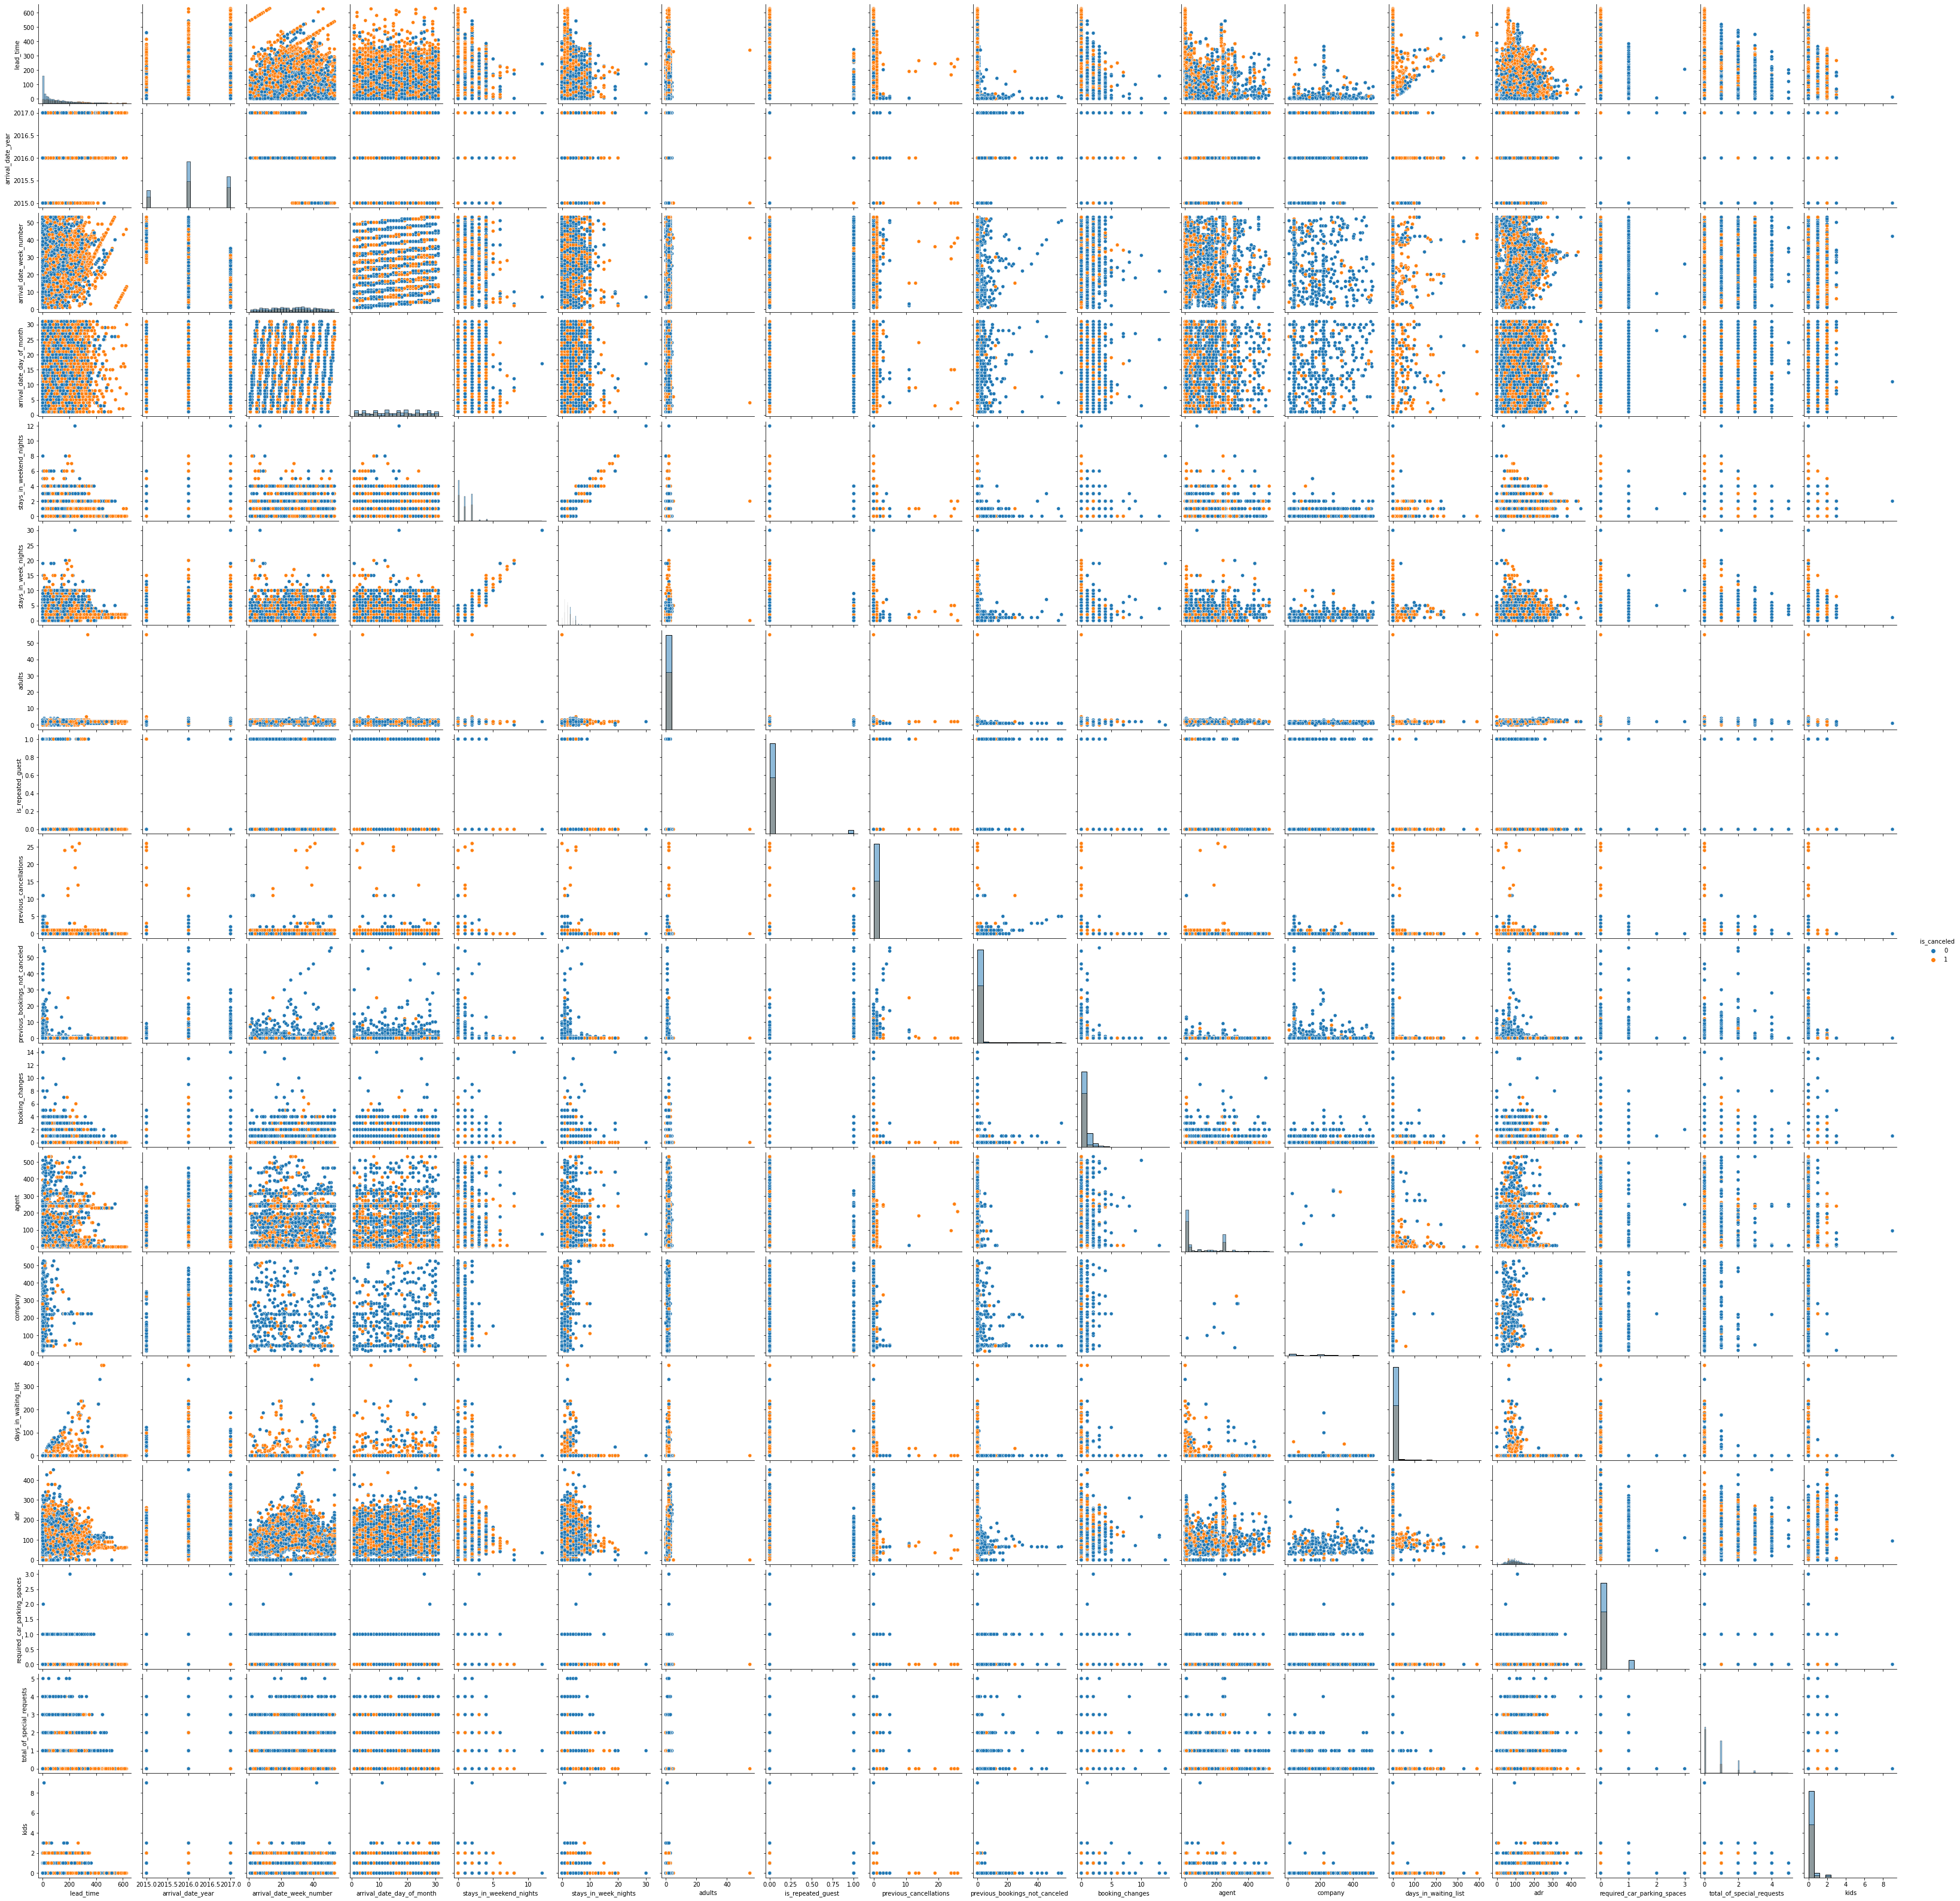

In [35]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=int(0.1 * data_raw.shape[0]), replace=False)
#X = X.iloc[random_subset]
#random_subset = np.random.choice(np.arange(X.shape[0]), size=int(0.1 * X.shape[0]), replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='is_canceled', diag_kind='hist')

# 3. Обработка пропущенных значений

In [36]:
data_missing_value = data_raw.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data_raw))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,kids,4,0.003


Признаки "country" и "kids" имеют незначительный процент пропущенных значений. Поэтому строки с пропущенными значениями можно удалить.

In [37]:
data_raw.dropna(axis=0, how='all', subset=['country'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['kids'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(118898, 31)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company                           112275
days_in_waiting_list                   0
customer_type   

Для двух других признаков заполним пропущенные значения медианными:

In [38]:
data_raw.median(axis = 0)

is_canceled                          0.0
lead_time                           69.0
arrival_date_year                 2016.0
arrival_date_week_number            28.0
arrival_date_day_of_month           16.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 2.0
adults                               2.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                               14.0
company                            179.0
days_in_waiting_list                 0.0
adr                                 95.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
kids                                 0.0
dtype: float64

In [39]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)
data_raw.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# 4. Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых признаков:

In [40]:
data_raw['reservation_status_date'] = data_raw['reservation_status_date'].transform(lambda s: int(s.replace('-', '').strip()))
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()


(118898, 261)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,27,1,0,0,2,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,27,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,27,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,27,1,0,2,2,0,0,...,1,0,0,0,0,1,0,0,1,0


# 5. Нормализация количественных признаков

Проведем нормализацию количественных признаков с помощью линейного преобразования к заданному отрезку [0,1]:

In [41]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,...,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.141535,0.578828,0.503203,0.493363,0.058056,0.061028,0.033789,0.032011,0.003352,...,0.876070,0.122567,0.001363,0.034281,0.004794,0.750004,0.210920,0.361234,0.628648,0.010118
std,0.483168,0.145052,0.353729,0.261346,0.292677,0.062264,0.046346,0.010520,0.176029,0.032533,...,0.329503,0.327941,0.036887,0.181952,0.069073,0.433012,0.407964,0.480360,0.483168,0.100078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.024423,0.500000,0.288462,0.233333,0.000000,0.024390,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.093623,0.500000,0.519231,0.500000,0.062500,0.048780,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.218453,1.000000,0.711538,0.733333,0.125000,0.073171,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Разбиение на обучающую и тестовую выборки

Для определения вероятности отмены брони будем использовать все признаки за исключением нескольких, удаленных ранее.

In [42]:
X = data_normal.drop(['is_canceled', 'market_segment_Undefined'], axis=1)
y = data_raw['is_canceled'].astype(np.float32)


Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(89173, 29725)

# 7. Обучение модели

Метод k ближайших соседей:

Попробуем сначала классификатор с количеством соседей по умолчанию (5):

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 99.65%, Test: 99.38%. 


Теперь 10 ближайших соседей:

In [48]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
knn_training_predict = 100 * knn_10.score(X_train, y_train)
knn_test_predict = 100 * knn_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 99.39%, Test: 99.23%. 


Видим, что точность полученной модели снизилась. Тогда снизим немного количество ближайших соседей до 7:

In [49]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
knn_training_predict = 100 * knn_7.score(X_train, y_train)
knn_test_predict = 100 * knn_7.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 99.59%, Test: 99.41%. 


На этот раз точность модели, обученной с помощью метода 7-ближайших соседей, на обучаемой выборке хуже модели, обученной с помощью метода 5-ближайших соседей на 0.06%, зато на тестовой выборке лучше на 0.03%.

Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию:

In [54]:
knn_train_predict = knn_default.score(X_train, y_train)
knn_test_predict = knn_default.score(X_test, y_test)

MSE_train = np.mean((knn_train_predict - y_train)**2)
MSE_test  = np.mean((knn_test_predict - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 0.63, Test: 0.62. 


Дерево решений:

Теперь рассмотрим следующий алгоритм - Дерево решений. Сначала снова воспользуемся параметрами по умолчанию, а именно будем считать, что максимальная глубина алгоритма отсутствует.

In [63]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_train_score = 100 * dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 1
Tree Leaves: 2
Accuracy. Train : 100.00%, Test: 100.00%. 


In [64]:
dct_10 = DecisionTreeClassifier(max_depth=10)
dct_10.fit(X_train,y_train)
dct_train_score = 100 * dct_10.score(X_train, y_train)
print ('Tree Depth:', dct_10.get_depth())
print ('Tree Leaves:', dct_10.get_n_leaves())
dct_test_score = 100 * dct_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 1
Tree Leaves: 2
Accuracy. Train : 100.00%, Test: 100.00%. 


In [65]:
dct_20 = DecisionTreeClassifier(max_depth=20)
dct_20.fit(X_train,y_train)
dct_train_score = 100 * dct_20.score(X_train, y_train)
print ('Tree Depth:', dct_20.get_depth())
print ('Tree Leaves:', dct_20.get_n_leaves())
dct_test_score = 100 * dct_20.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 1
Tree Leaves: 2
Accuracy. Train : 100.00%, Test: 100.00%. 


## Выводы:

В данной работе был представлен анализ данных овозможной отмене брони отелей, а также решена задача классификации с помощью моделей, натренированных двумя методами: К-ближайших соседей и Дерева Решений.

Таким образом, перед тем, как тренировать модель, нужно проанализировать данные и их подготовить:

1.Вычислить основные статистические характеристики и проанализировать их.

2.Проверить на пропущенные значения и, либо их заполнить модой/медианой, либо удалить строки, в которых присутствуют пропущенные значения (в данной работе было использовано именно это решение). Все зависит от корреляции признаков и количества данных и самих признаков.

3.Подготовить категориальные признаки - провести бинаризацию номинальных признаков.

4.Провести нормализацию количественных признаков - с помощью приведения к отрезку [0,1] (в данной работе было использовано такое решение) или с помощью стандартизации.

5.Разбить данные на обучающую и тестовую выборку.

6.Выбрать алгоритм классификации и проверить качество полученной модели.

В данной работе алгоритм Дерева Решений оказался лучше метода к-ближайших соседей как по точности, так и по производительности.